# 90 Minutes To Machine Learning

## Why are we here?
1. Intro to the Codeup experience
2. Big Picture overview of Data Science
3. Intro to Machine Learning concepts and tools including:
    - Data acquisition and preparation
    - Data visualization
    - Building a predictive model w/ Scikit-Learn
    - Evaluating how well a predictive model performs

## Why Codeup?
- Focus on student outcomes
- Placement services and quality of network
- Immersion works. Full-time, live instruction for 5 months works.
- Projects simulate the work environment from real world data to presenting findings to stakeholders

## What is Data Science?
- Interdisciplinary applied science intersecting programming, statistics, and domain expertise
- The application of the scientific method of hypothesis -> experiment -> analyze -> repeat to analyze and infer outcomes from data.
- A broad description of approaches ranging from business analysis and visualizations to machine learning and deep neural network analysis.
![](drawn_ds_venn_diagram.png)

## How Does Data Science Relate to Traditional Software and Data Analysis?
![](data_science_venn_diagram_with_overlapping_disciplines.png)

## What is Machine Learning?
- Machine Learning is the process of using previous data as the fuel for determining rules for making predictions of outcomes from future data.
-  Classical programming takes business rules and data to produce answers. Ex. TurboTax software.
- Machine learning takes in data (and sometimes answers/labels for some data) and produces rules or predictions for future data. The example here is text message autocomplete.

<img src="classical_programming_vs_machine_learning.jpeg" width=500>

## Where does Machine Learning Fit Into Data Science?

![example data science pipepine and product](example_data_science_project.png)


## Challenges of Machine Learning
- Garbage in, garbage out
- Insufficient quantity of data
- Nonrepresentative data
- Poor quality data
- Overfitting or underfitting
- Bias in, Bias out:
    - [Cognitive Biases](https://en.wikipedia.org/wiki/List_of_cognitive_biases) arise from being human.
    - [Statistical Biases](https://en.wikipedia.org/wiki/Bias_(statistics)) arise from our methodologies.
- Whatever Machine Learning "learns", it will keep doing. There is no cognition or intelligence, only pattern recognition and optimization.

## What kinds of questions can Data Science methods answer?
- How Many or How Much of something (Regression)
- Is this observation A or B, or C or D or E... (Classification)
- What groupings exist in the data already (Clustering)
- What should we expect to happen next? (Time Series Analysis)
- Is this weird? (Anomaly Detection)

## Types of Machine Learning and Other Skills Covered in Codeup
![machine learning methods taught at Codeup](machine_learning_methods.png)

## What kind of ML will we doing today?
- We'll be using a decision tree classifier to predict whether or not we should expect employees to quit a company.
- Classification machine learning is used all the time for such things as:
    - Facial recognition
    - Handwriting recognition and conversion to typed text
    - Recommendation engines
- Classification is a "supervised learning" type of machine learning. That means we train the algorithm on existing data to learn a rule, a recognized pattern, to apply to future data.

## How does a decision tree work:
- Decision Trees work like playing 20 questions. 
- Classification algorithms use training data to measure the distance between points or the distance around boundaries between points.
- By "learning" the pattern recognition around sets of points, the classifier produces a "decision rule" to use to apply to classify new incoming data.

#### Consider this diagram of a decision tree used to predict iris species w/ petal measurements 
![decision tree diagram](decision_tree_diagram.png)

## The Data Science Pipeline
1. Planning
2. Data Acquisition
3. Data Preparation
4. Data Exploration
5. Modeling
6. Deliver findings/takeaways

In [39]:
# Data Processing and Data Cleaning Libraries
import pandas as pd
import numpy as np

# Vizualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn preprocessing
from sklearn.model_selection import train_test_split

# modeling imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.metrics import classification_report

In [40]:
# We'll use this split function later to create in-sample and out-of-sample datasets for modeling
def split(df, stratify_by=None):
    """
    3 way split for train, validate, and test datasets
    To stratify, send in a column name
    """
    
    if stratify_by == None:
        train, test = train_test_split(df, test_size=.2, random_state=123)
        train, validate = train_test_split(df, test_size=.3, random_state=123)
    else:
        train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[stratify_by])
        train, validate = train_test_split(df, test_size=.3, random_state=123, stratify=train[stratify_by])
    
    return train, validate, test

In [65]:
# Acquire our data
df = pd.read_csv("data.csv", index_col=None)

# Get a sense of what each row/observation means
# See what columns we have to work with for this
# Our columns will be our features
df.head()

,Attrition,Age,MonthlyIncome,Gender,Education,WorkLifeBalance,JobSatisfaction,PercentSalaryHike,BusinessTravel
0,Yes,41,5993,Female,2,1,4,11,Travel_Rarely
1,No,49,5130,Male,1,3,2,23,Travel_Frequently
2,Yes,37,2090,Male,2,3,3,15,Travel_Rarely
3,No,33,2909,Female,4,3,3,11,Travel_Frequently
4,No,27,3468,Male,1,3,2,12,Travel_Rarely


# Planning Stage
- In this scenario, you are a Data Scientist at a company and your supervisor says:

_The Human Resources department needs your help. We know that employee attrition is expensive. It's bad for culture, and it costs a lot of time and money to recruit, hire, and onboard new employees. Here is a spreadsheet export of some of our HR information we have on employees. We need you to determine the predictors of an employee staying or leaving. What are the best predictors of attrition? Are the employee survey responses good indicators if people leave?_

### Critical Planning Questions?
- What's the business goal here?
- Who are the stakeholders?
- Why is this important to the business?

### Our Plan for this Dataset:
- Overall goal: Predict if a particular employee is going to leave the organization.
- Once we acquire the data, we'll need to clean/prepare it.

### Data Dictionary 
- A data dictionary explains the columns in a dataset and what the values in those columns mean. 
- In this dataset, here's what things mean:
    - `Attrition` specifies if this specific employee left the company or is still with the company.
    - `Age` is the employee age in years
    - `MonthlyIncome` is that employee's monthly salary figure.
    - `Gender` is a binary in this particular dataset
    - `Education` is a number value meaning the academic background of the employee: 
        1. No college
        2. Some college
        3. Bachelor degree
        4. Master's degree
        5. PhD level
    - `WorkLifeBalance` is a number value the employee reported on a company survey meaning:
        1. "Bad"
        2. "Good"
        3. "Better"
        4. "Best"
    - `JobSatisfaction` is a number value the employee reported on a company survey meaning:
        1. "Low"
        2. "Medium"
        3. "High"
        4. "Very High"
    - `PercentSalaryHike` is the percentage increase in salary since last year.
    - `BusinessTravel` specifies if the employee travels frequently, rarely, or never

# Data Preparation Stage
- Machine Learning algorithms can only work on numbers, so we need to convert some of our columns into numbers or booleans.
- For example, the `Attrition` and `Gender` columns only have 2 different values, so we will convert them into `True` or `False` (because those represent 0 or 1 in binary)
- The `BusinessTravel` column has 3 values, but "rarely" is close enough to "never", so we'll make this a binary too.
- In practice, real world data is _much_ messier than this example dataset.
- In industry, the data preparation stage is _critical_ because we can only perform machine learning on numeric and boolean (True/False) values.

In [66]:
# We'll map "Yes" to True and "No" to false for the Attrition column

df.Attrition = df.Attrition.apply(lambda x: 1 if x == "Yes" else 0)
df.head()

,Attrition,Age,MonthlyIncome,Gender,Education,WorkLifeBalance,JobSatisfaction,PercentSalaryHike,BusinessTravel
0,1,41,5993,Female,2,1,4,11,Travel_Rarely
1,0,49,5130,Male,1,3,2,23,Travel_Frequently
2,1,37,2090,Male,2,3,3,15,Travel_Rarely
3,0,33,2909,Female,4,3,3,11,Travel_Frequently
4,0,27,3468,Male,1,3,2,12,Travel_Rarely


In [68]:
# Now let's map the 
df.Gender = df.Gender.apply(lambda x: 1 if x == "Female" else 0)

# Then we'll rename the "Gender" column to is_female
df = df.rename(columns={"Gender": "is_female"})

# Let's check the data to be sure
df.head()

,Attrition,Age,MonthlyIncome,is_female,Education,WorkLifeBalance,JobSatisfaction,PercentSalaryHike,BusinessTravel
0,1,41,5993,1,2,1,4,11,Travel_Rarely
1,0,49,5130,0,1,3,2,23,Travel_Frequently
2,1,37,2090,0,2,3,3,15,Travel_Rarely
3,0,33,2909,1,4,3,3,11,Travel_Frequently
4,0,27,3468,0,1,3,2,12,Travel_Rarely


In [69]:
# Clean up other column names
df = df.rename(columns={"BusinessTravel": "FrequentTravel"})
df.FrequentTravel = df.FrequentTravel.apply(lambda x: 1 if x == "Travel_Frequently" else 0)

df.head()

,Attrition,Age,MonthlyIncome,is_female,Education,WorkLifeBalance,JobSatisfaction,PercentSalaryHike,FrequentTravel
0,1,41,5993,1,2,1,4,11,0
1,0,49,5130,0,1,3,2,23,1
2,1,37,2090,0,2,3,3,15,0
3,0,33,2909,1,4,3,3,11,1
4,0,27,3468,0,1,3,2,12,0


# Exploration Phase (Exploratory Data Analysis)
- This is where we visualize the data, perform statistical testing, and 
- The Explore stage is where we discover most of our insights
- It's _easy_ to spend a lot of time on Exploratory Data Analysis, so we'll stay high-level

In [46]:
df.Attrition.value_counts()

False    1233
True      237
Name: Attrition, dtype: int64

<AxesSubplot:>

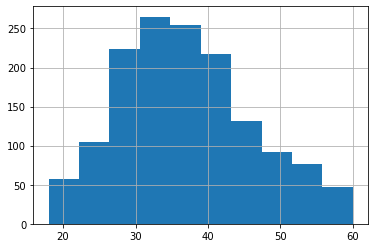

In [47]:
df.Age.hist()

<AxesSubplot:>

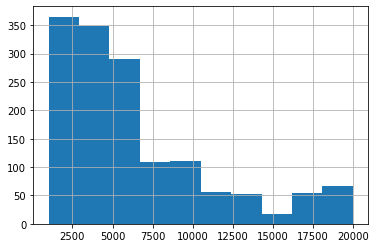

In [48]:
df.MonthlyIncome.hist()

<AxesSubplot:>

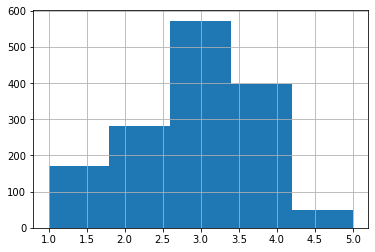

In [53]:
df.Education.hist(bins=5)

<AxesSubplot:>

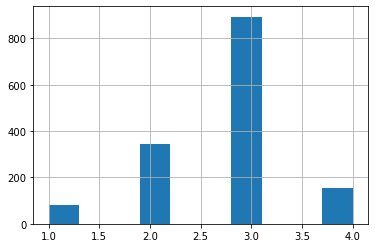

In [51]:
df.WorkLifeBalance.hist()

In [58]:
df.FrequentTravel.value_counts()

False    1193
True      277
Name: FrequentTravel, dtype: int64

In [61]:
df.MonthlyIncome.shape

(1470,)

In [62]:
df.Attrition.shape

(1470,)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

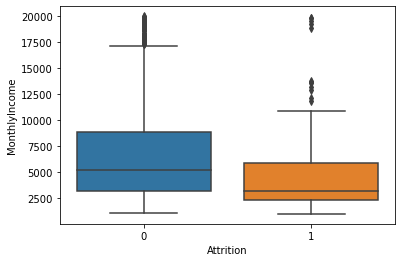

In [67]:
sns.boxplot(x=df.Attrition, y=df.MonthlyIncome, data=df)

<AxesSubplot:xlabel='Education', ylabel='MonthlyIncome'>

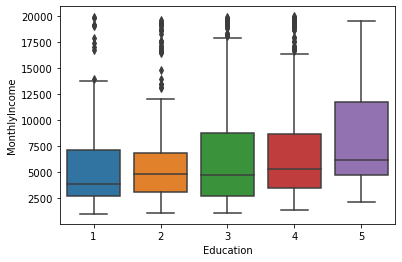

In [70]:
sns.boxplot(x=df.Education, y=df.MonthlyIncome, data=df)

In [ ]:
sns.boxplot(x=df.Attrition, y=df.Age, data=df)

In [ ]:
sns.boxplot(x=df.Attrition, y=df.DistanceFromHome, data=df)

In [ ]:
sns.boxplot(x=df.Attrition, y=df.MonthlyIncome, data=df)

In [ ]:
sns.boxplot(x=df.Attrition, y=df.NumCompaniesWorked, data=df)

## Homework